In [4]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim

In [14]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]*0.9
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -self.v[i]*0.9
                
    def CheckWallLimit(self,limits,dim=3):
        
        for i in range(dim):
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
        
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) 
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])


In [15]:

dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)
print(len(t))

def GetParticles(X0_, v0_, a0_, NParticles,Limit,Velo,Dim=2,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = X0_
        v0 = v0_
        a0 = a0_
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

Limits = np.array([20.,20.])

def RunSimulation( X0_, v0_, a0_, t,NParticles = 1, Velo = 50):
    
    Particles = GetParticles( X0_, v0_, a0_, NParticles,Limits[0],Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles
Particles = RunSimulation( np.array([-15., 5.]), np.array([1.,0.]), np.array([0., -9.8]), t,1,Velo=5)

def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,10)


def darTiempoRebote(P_, dt_):
    ran  = 0.001
    pos = 0 
    pp = P_.GetPositionVector()[:,1]
    for i in range(len(pp)-100):
        posactual    = pp[i]
        possiguiente = pp[i+100]
        resta1 = abs(posactual - possiguiente)

        if resta1 <= ran :
            pos += i
            break
    tiempo = dt_*pos
    return tiempo


3001


100%|██████████| 3001/3001 [00:00<00:00, 32205.93it/s]


<IPython.core.display.Javascript object>


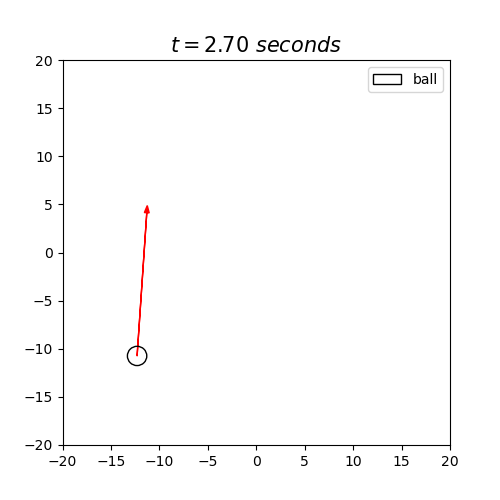

-0.5888747598589468


In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

print(Particles[0].GetVelocityVector()[3000,1])
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
         
        vx = p.GetVelocityVector()[i*10,0]
        vy = p.GetVelocityVector()[i*10,1] 
    
        circle = plt.Circle( (x,y), p.GetR(), color='k', fill=False, label = 'ball')
        
        plot = plt.arrow(x, y,vx,vy,color='r',head_width=0.5)
        
        plot = ax.add_patch(circle)
        plt.legend()
    return plot


Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)
plt.show()

In [8]:
print(f'El tiempo tarda la pelota en dejar de rebotar es de {darTiempoRebote(Particles[0], dt)} segundos, con 0.001 de error.')

El tiempo tarda la pelota en dejar de rebotar es de 18.84 segundos, con 0.001 de error.


<IPython.core.display.Javascript object>


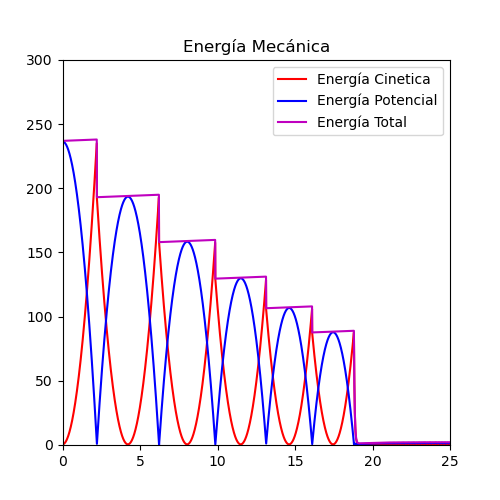

In [9]:
fig2 = plt.figure(figsize=(5,5))
ax2 = fig2.add_subplot(1,1,1)

P1 = Particles[0]
xp  = P1.GetPositionVector()[:,0]
yp  = P1.GetPositionVector()[:,1]
vpx = P1.GetVelocityVector()[:,0]
vpy = P1.GetVelocityVector()[:,1]
Vy = []
for i in range(len(vpy)):
    ny = vpy[i]+abs(np.min(vpy))
    Vy.append(ny)
    
def EK(m, vx_, vy_):
    K = []
    for i in range(len(vx_)):
        k = (((((vx_[i]**2)+(vy_[i]**2))**(1/2))**2)*m)/2
        K.append(k)
    return K
def EP(m_, h_):
    Ep = []
    hm = np.min(h_)
    g = 9.8
    for i in range(len(h_)):
        pot = (m_*g*h_[i])+187.48656030720136
        Ep.append(pot)
    return Ep

EM = []
for i in range(len(EP(1, yp))):
    em = EP(1, yp)[i] + EK(1, vpx, vpy)[i]
    EM.append(em)
ax2.plot(t, EK(1, vpx, vpy), c='r', label = 'Energía Cinetica')
ax2.plot(t, EP(1, yp), c= 'b', label = 'Energía Potencial')
ax2.plot(t,EM, c='m' , label = 'Energía Total')
ax2.set_title('Energía Mecánica')
plt.xlim(0,25)
plt.ylim(0,300)
plt.legend()
plt.show()

100%|██████████| 3001/3001 [00:07<00:00, 379.03it/s]


<IPython.core.display.Javascript object>


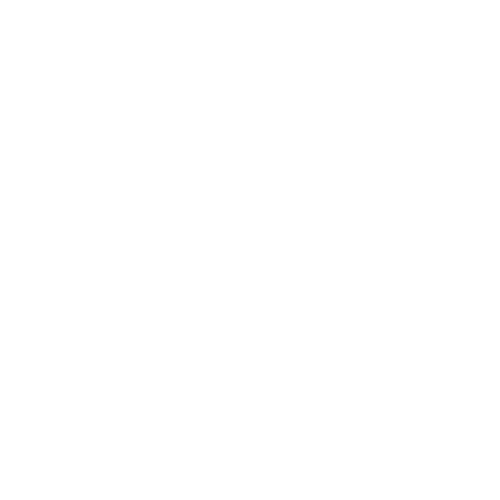

In [13]:
def GetParticles1(NParticles,Limits,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limits+1.0, Limits-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_


Limits1 = np.array([10.,10.,10.])

def RunSimulation1(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles1(NParticles,Limits1[0],Velo = Velo,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimit(Limits1)
            Particles[i].Evolution(it)
        
        
    return Particles


Particles = RunSimulation1(t,100,Velo=6)
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1,projection="3d",elev=30,azim=50)
redt1 = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

def init_1():
    ax.set_xlim(-Limits1[0],Limits1[0])
    ax.set_ylim(-Limits1[1],Limits1[1])
    ax.set_zlim(-Limits1[2],Limits1[2])
    
    ax.set_xlabel('x[m]')
    ax.set_ylabel('y[m]')
    ax.set_zlabel('z[m]')

def Update_1(i):
    
    plot = ax.clear()
    init_1()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt1[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]

        ax.scatter(x,y,z,marker=".", color = "darkslategrey")

    return plot

Animation1 = anim.FuncAnimation(fig,Update_1,frames=len(redt1),init_func=init)
Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=50, metadata=dict(artist='Me'))
Animation1.save('Gas 3D.mp4', writer=writer_)